# Análise Estatística de Grupos

Este script realiza análises estatísticas em grupos de dados usando pandas, numpy, scipy, seaborn e scikit-posthocs.

## Instalação de Dependências

Para executar este código, você precisará instalar a biblioteca `scikit-posthocs`. Você pode instalá-la executando o seguinte comando:

```bash
!pip install scikit-posthocs
```

# Bibliotecas Utilizadas

- **seaborn**: Para visualização de dados.
- **scipy.stats**: Para testes estatísticos, como Kruskal-Wallis, Mann-Whitney U, Friedman, Wilcoxon, etc.
- **scikit-posthocs**: Para realizar comparações post-hoc após testes estatísticos.
- **matplotlib.pyplot**: Para criar gráficos.
- **pandas**: Para manipulação de dados.
- **numpy**: Para geração de números aleatórios e operações matemáticas.
- **itertools.combinations**: Para geração de combinações de grupos.

# Funcionalidades

Este script oferece as seguintes funcionalidades:

- Geração de dados aleatórios para grupos de amostras.
- Realização de testes estatísticos, como Kruskal-Wallis, Mann-Whitney U, Friedman, Wilcoxon, etc.
- Comparação post-hoc entre grupos significativos.
- Criação de gráficos, como boxplots, para visualização dos dados e comparações.

In [ ]:
!pip install scikit-posthocs
import seaborn as sns
from scipy.stats import kruskal, mannwhitneyu, friedmanchisquare, wilcoxon
import scikit_posthocs as sp
from scikit_posthocs import posthoc_dunn
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
from itertools import combinations

# Explicação do Código

O código apresentado realiza a geração de dados aleatórios para três grupos diferentes e os concatena em um único DataFrame usando a biblioteca pandas.

## Passos do Código

1. **Definindo o número de amostras por grupo**:
   - A variável `n` é utilizada para determinar o número de amostras que serão geradas para cada grupo. No exemplo fornecido, `n` é definido como 20.

2. **Definindo a semente para tornar os valores reprodutíveis**:
   - A função `np.random.seed(42)` define uma semente para gerar números aleatórios, garantindo que os mesmos valores sejam produzidos sempre que o código for executado novamente. Isso é útil para garantir a reprodutibilidade dos resultados.

3. **Gerando dados para cada grupo**:
   - Para cada grupo (`grupo1`, `grupo2` e `grupo3`), são criados DataFrames contendo colunas para a amostra, bem como variáveis dependentes (`Var1`, `Var2`, `Var3` e `Var4`). Os valores dessas variáveis são gerados aleatoriamente com diferentes distribuições, como normal, poisson e exponencial, usando as funções `np.random.normal`, `np.random.poisson` e `np.random.exponential`, respectivamente.

4. **Concatenando os grupos em um único DataFrame**:
   - Utilizando a função `pd.concat`, os DataFrames de cada grupo são concatenados em um único DataFrame `df`.

5. **Visualização dos primeiros registros do DataFrame**:
   - Por fim, a função `df.head()` é chamada para exibir os primeiros registros do DataFrame gerado, permitindo uma visualização rápida dos dados.

Este código é útil para gerar conjuntos de dados aleatórios para fins de análise estatística e modelagem de dados.


In [89]:
# Definindo o número de amostras por grupo
n = 20

# Definindo a semente para tornar os valores reprodutíveis
np.random.seed(42)

# Gerando dados para cada grupo
grupo1 = pd.DataFrame({
    'Amostra': range(1, n+1),
    'Var1': np.random.normal(loc=10, scale=2, size=n),
    'Var2': np.random.poisson(lam=5, size=n),
    'Var3': np.random.exponential(scale=1, size=n),
    'Var4': np.random.normal(scale=2, size=n),
    'Grupo': 'Grupo 1'
})

grupo2 = pd.DataFrame({
    'Amostra': range(1, n+1),
    'Var1': np.random.normal(loc=12, scale=2, size=n),
    'Var2': np.random.poisson(lam=7, size=n),
    'Var3': np.random.exponential(scale=1.2, size=n),
    'Var4': np.random.poisson(lam=2, size=n),
    'Grupo': 'Grupo 2'
})

grupo3 = pd.DataFrame({
    'Amostra': range(1, n+1),
    'Var1': np.random.normal(loc=8, scale=2, size=n),
    'Var2': np.random.poisson(lam=3, size=n),
    'Var3': np.random.exponential(scale=0.8, size=n),
    'Var4': np.random.exponential(scale=1.0, size=n),
    'Grupo': 'Grupo 3'
})

# Concatenando os grupos em um único DataFrame
df = pd.concat([grupo1, grupo2, grupo3])

df.head()


,Amostra,Var1,Var2,Var3,Var4,Grupo
0,1,10.993428,5,0.687659,1.173714,Grupo 1
1,2,9.723471,3,0.357930,4.380911,Grupo 1
2,3,11.295377,6,0.335250,-1.981073,Grupo 1
3,4,13.046060,3,0.037584,-1.132595,Grupo 1
4,5,9.531693,9,0.940492,0.199303,Grupo 1


# Explicação do Código

O código `df.isnull().sum()` é utilizado para contar o número de valores nulos em cada coluna do DataFrame `df`. Este é um passo comum na análise exploratória de dados para identificar a presença de dados ausentes.

## Passos do Código

1. **Checar valores nulos**:
   - O método `isnull()` verifica cada valor no DataFrame e retorna `True` se o valor for nulo e `False` caso contrário. Isso cria um DataFrame de valores booleanos indicando a presença de valores nulos (`True`) ou não (`False`).

2. **Somar valores nulos por coluna**:
   - O método `sum()` é então aplicado ao DataFrame de valores booleanos, retornando a contagem de valores `True` (ou seja, nulos) ao longo de cada coluna. Isso fornece o número total de valores nulos em cada coluna.


In [90]:
df.isnull().sum()

Amostra    0
Var1       0
Var2       0
Var3       0
Var4       0
Grupo      0
dtype: int64

# Explicação do Código

O código `df['Grupo'] = df['Grupo'].astype('category')` e `ordemCorreta = ['Grupo 1', 'Grupo 2', 'Grupo 3']` são utilizados para converter a coluna 'Grupo' em uma variável categórica e reordenar suas categorias, respectivamente.

## Passos do Código

1. **Convertendo para categoria**:
   - A linha `df['Grupo'] = df['Grupo'].astype('category')` converte a coluna 'Grupo' em uma variável do tipo categórica. Isso é útil quando os valores da coluna representam categorias discretas, como é o caso aqui.

2. **Reordenando categorias**:
   - A lista `ordemCorreta = ['Grupo 1', 'Grupo 2', 'Grupo 3']` define a ordem desejada para as categorias da coluna 'Grupo'. Em seguida, a linha `df['Grupo'] = df['Grupo'].cat.reorder_categories(ordemCorreta)` reordena as categorias da variável categórica 'Grupo' de acordo com a lista `ordemCorreta`.

## Interpretação dos Resultados

Após a execução deste código, a coluna 'Grupo' será convertida em uma variável categórica e suas categorias serão reordenadas de acordo com a lista `ordemCorreta`. Isso pode ser útil para garantir uma ordenação consistente e adequada ao realizar visualizações ou análises que envolvam esta variável.

Este código é particularmente útil ao lidar com variáveis categóricas em análises exploratórias ou modelagem de dados.


In [91]:
df['Grupo'] = df['Grupo'].astype('category')
ordemCorreta = ['Grupo 1', 'Grupo 2', 'Grupo 3']
df['Grupo'] = df['Grupo'].cat.reorder_categories(ordemCorreta)

# Explicação do Código

O código fornecido contém várias funções que visam facilitar a análise estatística e a visualização de dados em um DataFrame. Essas funções realizam testes estatísticos e criam boxplots para comparação visual entre grupos de dados.

## Funções

### Função `intersecao(lista1, lista2)`

- **Objetivo**: Esta função retorna a interseção entre duas listas.
- **Parâmetros**:
  - `lista1`: Primeira lista.
  - `lista2`: Segunda lista.
- **Retorno**: Uma lista contendo os elementos que estão presentes em ambas as listas.

### Função `todasInsersecao(df=df, grupo='Grupo',amostra='Amostra')`

- **Objetivo**: Esta função encontra a interseção entre as amostras de todos os grupos para pareamento.
- **Parâmetros**:
  - `df`: DataFrame contendo os dados.
  - `grupo`: Nome da coluna que representa os grupos.
  - `amostra`: Nome da coluna que representa as amostras.
- **Retorno**: Uma lista contendo as amostras que estão presentes em todos os grupos.

### Funções de Teste Estatístico
- `realizar_teste_friedman(*grupos)`: Realiza o teste de Friedman.
- `realizar_teste_wilcoxon(grupo1, grupo2)`: Realiza o teste de Wilcoxon.
- `realizar_teste_kruskal(*grupos)`: Realiza o teste de Kruskal-Wallis.
- `realizar_teste_mannwhitneyu(grupo1, grupo2)`: Realiza o teste de Mann-Whitney U.

### Função `criar_boxplots(df, coluna_grupo, colunas_variaveis, pareado=False, coluna_pareamento=None, cores=None)`

- **Objetivo**: Cria boxplots para visualização dos dados e comparações entre grupos.
- **Parâmetros**:
  - `df`: DataFrame contendo os dados.
  - `coluna_grupo`: Nome da coluna que representa os grupos.
  - `colunas_variaveis`: Lista com os nomes das colunas que representam as variáveis dependentes.
  - `pareado`: Indica se a comparação entre grupos é pareada.
  - `coluna_pareamento`: Nome da coluna usada para pareamento (se `pareado=True`).
  - `cores`: Paleta de cores para os boxplots.
- **Comportamento**: A função cria boxplots para cada variável dependente em relação aos grupos especificados. Se a opção `pareado` estiver habilitada, são realizados testes estatísticos e comparações entre grupos para destacar diferenças significativas.

## Utilização

Você pode utilizar estas funções da seguinte maneira:

1. Importe as funções necessárias.
2. Carregue seus dados em um DataFrame do pandas.
3. Chame as funções fornecidas, passando o DataFrame e os parâmetros apropriados.

Estas funções são úteis para análise exploratória de dados e visualização de comparações entre grupos em estudos estatísticos.


In [92]:
def intersecao(lista1, lista2):
  var = list(set(lista1).intersection(lista2))
  # print(var)
  return var

def todasInsersecao(df=df, grupo='Grupo',amostra='Amostra'):

  # Pareamento de amostras
  paired_samples = []

  for _, group_df in df.groupby(grupo):
      # Parear as amostras usando itertools.combinations
      paired_samples.append(list(group_df[amostra]))


  for i in range(len(paired_samples)-1):
    if i == 0:
      intersect = intersecao(paired_samples[i], paired_samples[i+1])

    else:
      intersect = intersecao(intersect, paired_samples[i+1])

  return intersect

def realizar_teste_friedman(*grupos):
    _, p_value_friedman = friedmanchisquare(*grupos)
    return p_value_friedman

def realizar_teste_wilcoxon(grupo1, grupo2):
    _, p_value_wilcoxon = wilcoxon(grupo1, grupo2)
    return p_value_wilcoxon

def realizar_teste_kruskal(*grupos):
    kruskal_stat, p_value = kruskal(*grupos)
    return p_value

def realizar_teste_mannwhitneyu(grupo1, grupo2):
    _, p_value = mannwhitneyu(grupo1, grupo2)
    return p_value

def criar_boxplots(df, coluna_grupo, colunas_variaveis, pareado=False, coluna_pareamento=None, cores=None):
    sns.set_style(rc={'axes.facecolor': '#efefef'})
    ncols = 2
    nrows = math.ceil(len(colunas_variaveis) / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12), sharex=True)

    for i, column in enumerate(colunas_variaveis):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(data=df, x=coluna_grupo, y=column, hue=coluna_grupo, ax=ax, palette=cores)
        ax.set_ylabel(column)
        ax.set_xlabel(coluna_grupo)

        desenhar_comparacao = False
        if pareado:
            intersect = df[coluna_pareamento].unique()
            df_pivoted = df[df[coluna_pareamento].isin(intersect)].pivot_table(index=coluna_pareamento, columns=coluna_grupo, values=column, aggfunc='mean').reset_index()
            df_pivoted = df_pivoted.set_index(coluna_pareamento)
            stacked_data = df_pivoted.stack().reset_index()
            stacked_data.columns = ['id', 'treatments', 'values']

            if len(df[coluna_grupo].unique()) > 2:
                if realizar_teste_friedman(*[df_pivoted[grupo] for grupo in df_pivoted.columns]) < 0.05:
                    desenhar_comparacao = True
                    results = sp.posthoc_nemenyi(stacked_data, val_col='values', group_col='treatments')
            else:
                for group1 in df[coluna_grupo].unique():
                    for group2 in df[coluna_grupo].unique():
                        if group1 < group2:
                            wilcoxon_p_value = realizar_teste_wilcoxon(df[df[coluna_grupo] == group1][column], df[df[coluna_grupo] == group2][column])
                            if wilcoxon_p_value < 0.05:
                                results = pd.DataFrame(index=df[coluna_grupo].unique(), columns=df[coluna_grupo].unique())
                                results.loc[group1, group2] = wilcoxon_p_value
                                results.loc[group2, group1] = wilcoxon_p_value
                                desenhar_comparacao = True

        else:
            if len(df[coluna_grupo].unique()) > 2:
                if realizar_teste_kruskal(*[group[column] for name, group in df.groupby(coluna_grupo)]) < 0.05:
                    desenhar_comparacao = True
                    results = sp.posthoc_dunn(df, val_col=column, group_col=coluna_grupo, p_adjust='bonferroni')
            else:
                for group1 in df[coluna_grupo].unique():
                    for group2 in df[coluna_grupo].unique():
                        if group1 < group2:
                            mannwhitney_p_value = realizar_teste_mannwhitneyu(df[df[coluna_grupo] == group1][column], df[df[coluna_grupo] == group2][column])
                            if  mannwhitney_p_value < 0.05:
                                results = pd.DataFrame(index=df[coluna_grupo].unique(), columns=df[coluna_grupo].unique())
                                results.loc[group1, group2] = mannwhitney_p_value
                                results.loc[group2, group1] = mannwhitney_p_value
                                desenhar_comparacao = True

        if desenhar_comparacao:
            significance_level = 0.05
            group_names = df[coluna_grupo].unique()
            for i, group1 in enumerate(group_names):
                for j, group2 in enumerate(group_names):
                    if i < j and not pd.isna(results.loc[group1, group2]) and results.loc[group1, group2] < significance_level:
                        x1 = i
                        x2 = j
                        y_position = max(ax.get_ylim()) * 1.02
                        ax.plot([x1, x2], [y_position, y_position], color='black', linewidth=2)

    plt.tight_layout()
    plt.savefig('comparacoesVariaveis.png', dpi=300)
    plt.show()

# Configuração do Boxplot com Emparelhamento

Este trecho de código configura e gera boxplots com emparelhamento para visualização das variáveis dependentes.

## Configuração

- **Emparelhamento**: `pareado = True`
  - Indica que a comparação entre grupos será pareada.

- **Lista de Variáveis**: `colunas_variaveis`
  - Lista de colunas que serão incluídas no boxplot para visualização das variáveis dependentes.

- **Nomes dos Eixos**: `nomeEixos`
  - Dicionário contendo os nomes dos eixos para cada variável dependente.

- **Cores dos Grupos**: `cores`
  - Dicionário que mapeia os nomes dos grupos para as cores a serem usadas nos boxplots.

- **DataFrame Temporário**: `df_temp`
  - DataFrame que contém os dados a serem plotados.

- **Coluna de Grupo**: `colunaGrupo`
  - Nome da coluna que representa os grupos.

- **Coluna de Emparelhamento**: `colunaPareamento`
  - Nome da coluna usada para o pareamento das amostras.

- **Nome do Eixo X**: `nomeEixoX`
  - Nome do eixo X nos boxplots.

## Utilização

Este trecho de código configura os parâmetros necessários para gerar boxplots com emparelhamento. Após a execução deste código, você pode chamar a função `criar_boxplots()` passando esses parâmetros para criar os boxplots e visualizar as comparações entre grupos.


In [93]:
pareado = True

# Lista de colunas a serem incluídas no boxplot
colunas_variaveis = [
    "Var1","Var2",
    "Var3","Var4"
]

nomeEixos = {
    "Var1":"Var1","Var2":"Var2","Var3":"Var3", "Var4":"Var4"
}

# Escolha as cores dos grupos
cores = {"Grupo 1":"#003049", "Grupo 2":"#d62828", "Grupo 3":"#f77f00"}
df_temp = df
colunaGrupo = "Grupo"
colunaPareamento = "Amostra"
nomeEixoX = "Grupos"

# Criação de Boxplots com Emparelhamento

Este trecho de código chama a função `criar_boxplots()` para criar boxplots com emparelhamento para visualização das variáveis dependentes.

## Parâmetros

- **DataFrame**: `df`
  - DataFrame contendo os dados a serem plotados.

- **Coluna de Grupo**: `colunaGrupo`
  - Nome da coluna que representa os grupos.

- **Variáveis Dependentes**: `colunas_variaveis`
  - Lista de colunas que serão incluídas no boxplot para visualização das variáveis dependentes.

- **Emparelhamento**: `pareado=True`
  - Indica que a comparação entre grupos será pareada.

- **Coluna de Emparelhamento**: `coluna_pareamento='Amostra'`
  - Nome da coluna usada para o pareamento das amostras.

- **Cores dos Grupos**: `cores`
  - Dicionário que mapeia os nomes dos grupos para as cores a serem usadas nos boxplots.

## Utilização

Este trecho de código chama a função `criar_boxplots()` passando os parâmetros necessários para criar os boxplots com emparelhamento. Após a execução deste código, os boxplots serão gerados, permitindo visualizar as comparações entre os grupos.


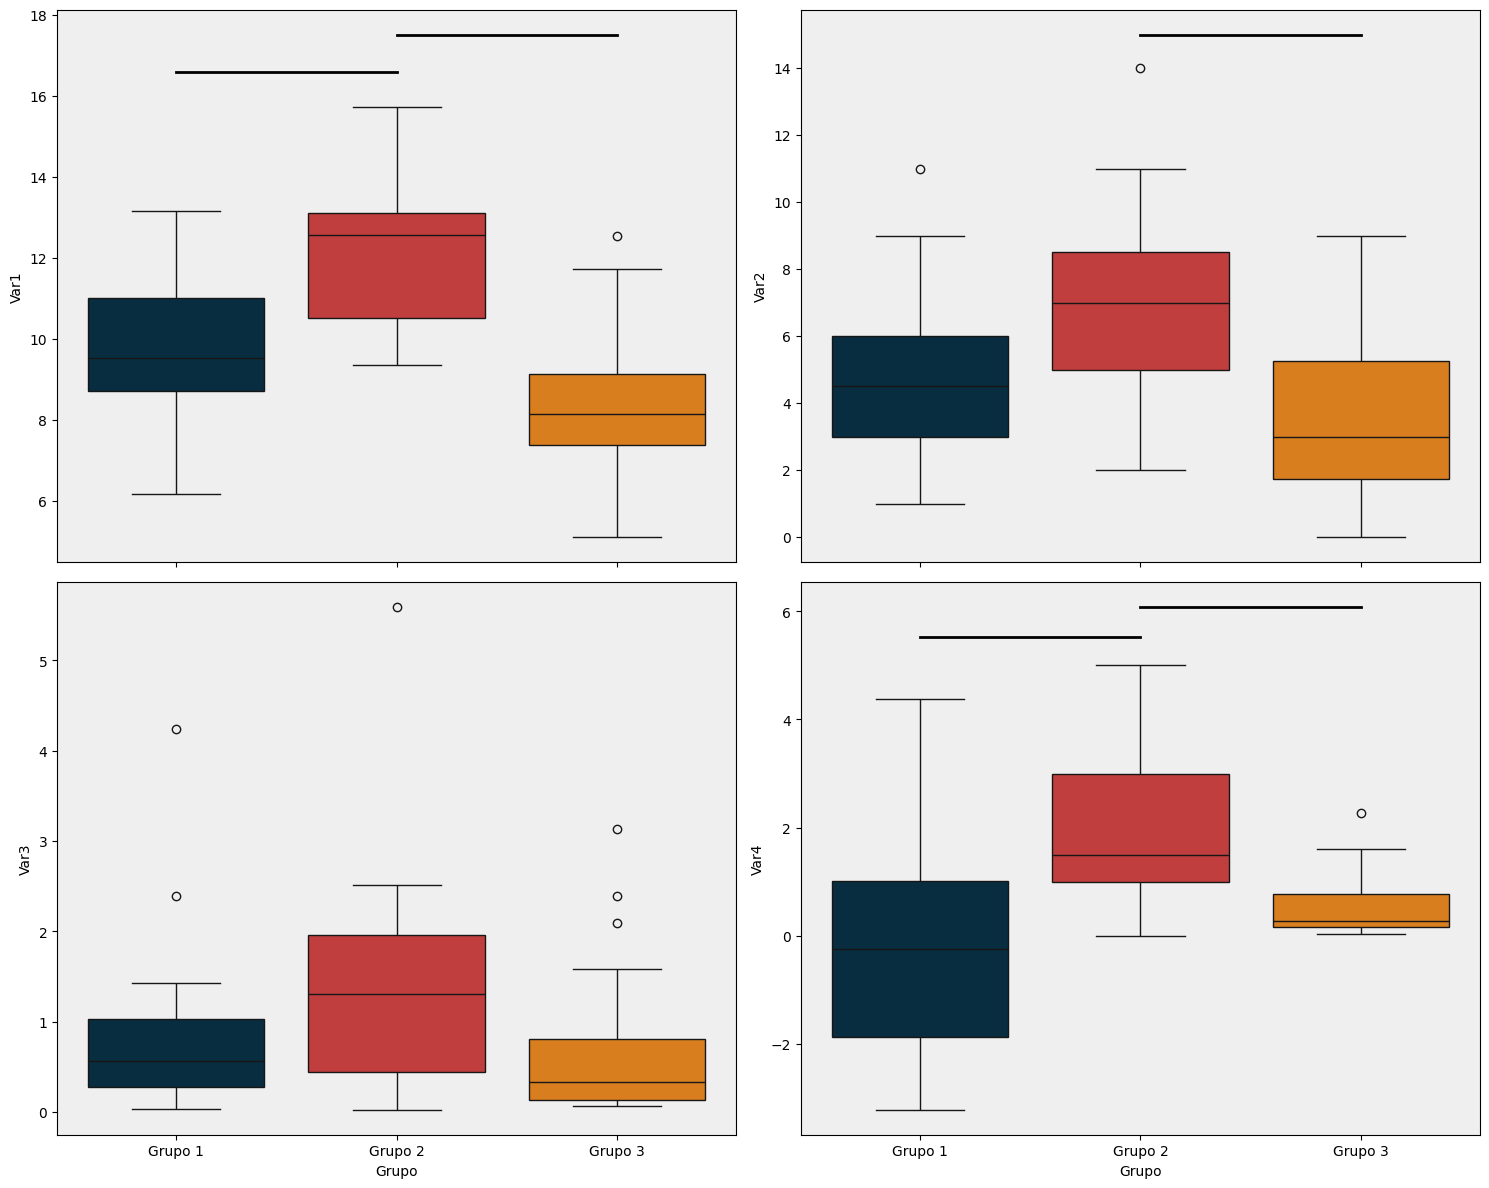

In [94]:
criar_boxplots(df, colunaGrupo, colunas_variaveis, pareado=True, coluna_pareamento='Amostra', cores=cores)